In [75]:
import matplotlib
import matplotlib.pyplot as plots
%matplotlib inline
import numpy as np
import pandas as pd
baby = pd.read_csv('baby.csv')

In [76]:
baby

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1170,113,275,27,60,100,False
1170,1171,128,265,24,67,120,False
1171,1172,130,291,30,65,150,True
1172,1173,125,281,21,65,110,False


In [77]:
smoking_and_birthweight = baby[['Maternal.Smoker', 'Birth.Weight']]
smoking_and_birthweight

,Maternal.Smoker,Birth.Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [78]:
smoking_and_birthweight['Maternal.Smoker'] == True

0       False
1       False
2        True
3        True
4       False
        ...  
1169    False
1170    False
1171     True
1172    False
1173    False
Name: Maternal.Smoker, Length: 1174, dtype: bool

In [79]:
smoker = smoking_and_birthweight['Birth.Weight'] [smoking_and_birthweight['Maternal.Smoker'] == True]
smoker

2       128
3       108
8       143
10      144
11      141
       ... 
1162    143
1163    113
1164    109
1165    103
1171    130
Name: Birth.Weight, Length: 459, dtype: int64

In [80]:
non_smoker = smoking_and_birthweight['Birth.Weight'] [smoking_and_birthweight['Maternal.Smoker'] == False]
non_smoker

0       120
1       113
4       136
5       138
6       132
       ... 
1168    132
1169    113
1170    128
1172    125
1173    117
Name: Birth.Weight, Length: 715, dtype: int64

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

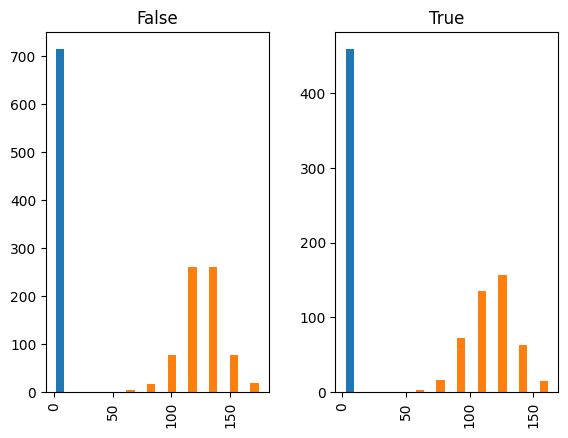

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
smoking_and_birthweight.hist(by ='Maternal.Smoker')

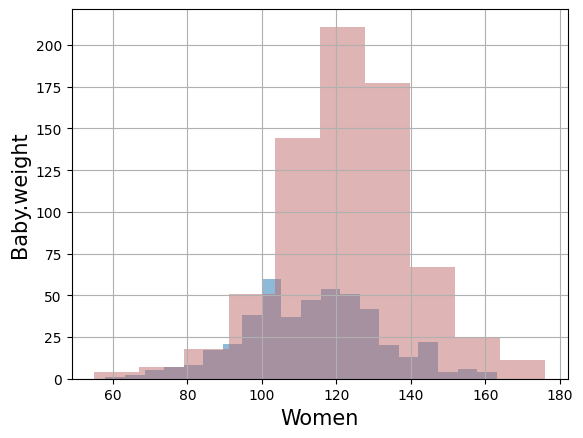

In [82]:
import seaborn as sns
smoker.hist(histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Baby.weight',fontsize=15)
plt.show()

In [83]:
means_table = smoking_and_birthweight.groupby('Maternal.Smoker').mean()
type(means_table)

pandas.core.frame.DataFrame

In [84]:
means_table

,Birth.Weight
Maternal.Smoker,
False,123.085315
True,113.819172


In [85]:
observed_difference = means_table['Birth.Weight'][1] - means_table['Birth.Weight'][0]
observed_difference

C:\Users\DELL\AppData\Local\Temp\ipykernel_5800\2384845928.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  observed_difference = means_table['Birth.Weight'][1] - means_table['Birth.Weight'][0]


-9.266142572024918

In [88]:
smoking_and_birthweight1=smoking_and_birthweight.copy(deep=True)
smoking_and_birthweight1.loc[:, 'third_column'] = smoking_and_birthweight1['Birth.Weight'].sample(frac=1).values
smoking_and_birthweight1

,Maternal.Smoker,Birth.Weight,third_column
0,False,120,111
1,False,113,132
2,True,128,118
3,True,108,130
4,False,136,113
...,...,...,...
1169,False,113,139
1170,False,128,94
1171,True,130,114
1172,False,125,106


In [87]:
mean1=smoking_and_birthweight["Birth.Weight"][smoking_and_birthweight["Maternal.Smoker"]==True].mean()-smoking_and_birthweight["Birth.Weight"][smoking_and_birthweight["Maternal.Smoker"]==False].mean()
mean1

-9.266142572024918

In [91]:
import numpy as np
import array
differences = np.zeros(5000)
for _ in range(5000):
    smoking_and_birthweight = baby[['Maternal.Smoker', 'Birth.Weight']]
    shuffled = smoking_and_birthweight.sample(1174,replace = False)
    shuffled_weights = shuffled['Birth.Weight']
    original_and_shuffled = smoking_and_birthweight.assign(shuffled_weights=shuffled_weights.values )
    all_group_means= original_and_shuffled.groupby('Maternal.Smoker').mean()
    differences[_] = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]


C:\Users\DELL\AppData\Local\Temp\ipykernel_5800\2262187866.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  differences[_] = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
C:\Users\DELL\AppData\Local\Temp\ipykernel_5800\2262187866.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  differences[_] = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
C:\Users\DELL\AppData\Local\Temp\ipykernel_5800\2262187866.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels

0.008750936209759726


C:\Users\DELL\AppData\Local\Temp\ipykernel_5800\2262187866.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  differences[_] = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
C:\Users\DELL\AppData\Local\Temp\ipykernel_5800\2262187866.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  differences[_] = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
C:\Users\DELL\AppData\Local\Temp\ipykernel_5800\2262187866.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels